# Radiation Laws #


## Planck's Black Body Function ##


$$ b_\lambda(T, \lambda) = \frac{c_1}{\lambda^5\left( \exp\left(\frac{c_2}{\lambda T}\right)-1 \right)}$$

$$ 𝑐_1=2\pi h c^2 = 3.741\cdot 10 ^{−16} \mathrm{Wm^2} $$

$$ 𝑐_2=\frac{hc}{k} = 1.438\cdot 10^{−2} \mathrm{mK} $$

## Stefan-Boltzmann Law ##

$$\int_0^{+\infty} b_\lambda(\lambda,T) d\lambda = \sigma T^4$$

## Wien's Displacement Law ##

$$ \lambda_\mathrm{max} = \frac{2898\;\mathrm{\mu m\cdot K}}{T} $$

In [1]:
# Import constants and rename them

#import scipy.constants as sc
#k = sc.k
#h = sc.h
#c = sc.c
#sigma = sc.sigma
#pi = sc.pi

# Simpler: 
from scipy.constants import pi, c, h, k, sigma

print("PYSICAL CONSTANTS")
print("----------------------")
print("Pi:                   pi = %g " % pi)
print("Vac. peed of light:    c = %g m/s" % c)
print("Plan                   h = %g Js" % h)
print("Boltzmann:             k = %g J/K" % k)
print("Stefan-Boltzmann:  sigma = %g W/(m^2 K^4)" % sigma)

PYSICAL CONSTANTS
----------------------
Pi:                   pi = 3.14159 
Vac. peed of light:    c = 2.99792e+08 m/s
Plan                   h = 6.62607e-34 Js
Boltzmann:             k = 1.38065e-23 J/K
Stefan-Boltzmann:  sigma = 5.67037e-08 W/(m^2 K^4)


In [2]:
import numpy as np
from numpy import exp

In [3]:
def planck (T, lam):
#    c = 2.99792458e8   # m/s , vacuum speed of light
#    h = 6.62607004e-34 # m² kg/s , Planck's constant
#    k = 1.38064852e-23 # m² kg / (s² K)

    c1 = 2*pi*h*c**2
    c2 = h*c/k
 
    b_lam = c1 / (lam**5*(exp(c2/(lam*T))-1))
    return(b_lam)

In [4]:
# CALCULATE
lam = np.arange(1.0,10000.1)*1e-9
T = 6000
b_lam = planck(T,lam)

In [5]:
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

plt.rcParams['figure.figsize'] = (4,3)
plt.rcParams['figure.dpi'] = 136
plt.show()

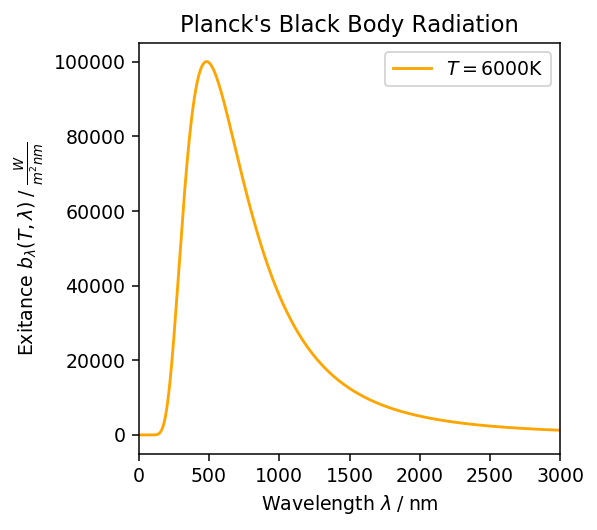

In [6]:
# For doc on axes class see: https://matplotlib.org/api/axes_api.html

#fig = plt.figure(1, figsize=(4,3), dpi = 136)
#ax1 = fig.add_subplot(111)

#fig, ax1 = plt.subplots(1, 1, figsize=(4,4), dpi = 136, constrained_layout=True)
fig, ax1 = plt.subplots(1, 1, figsize=(4,4), dpi = 136)

ax1.set_title("Planck's Black Body Radiation")
ax1.set_xlabel(r"Wavelength $\lambda\;/\;\mathrm{nm}$")
ax1.set_ylabel(r"Exitance $b_\lambda(T, \lambda)\;/\;\frac{W}{m^2 nm}$")
ax1.plot(lam*1e9, b_lam*1e-9,"-",color="orange", label="$T=6000\mathrm{K}$") # local definitions: line and marker style, color
ax1.legend()
ax1.set_xlim([0,3000])
plt.show() # This makes Jupyter read the resources!

In [7]:
T = 6000
b_lam = planck(T,lam)
b_T = sigma*T**4

fac = 1/20.
e_lam = fac * b_lam
e_T = fac*b_T

Figure Super Title: https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/figure_title.html 

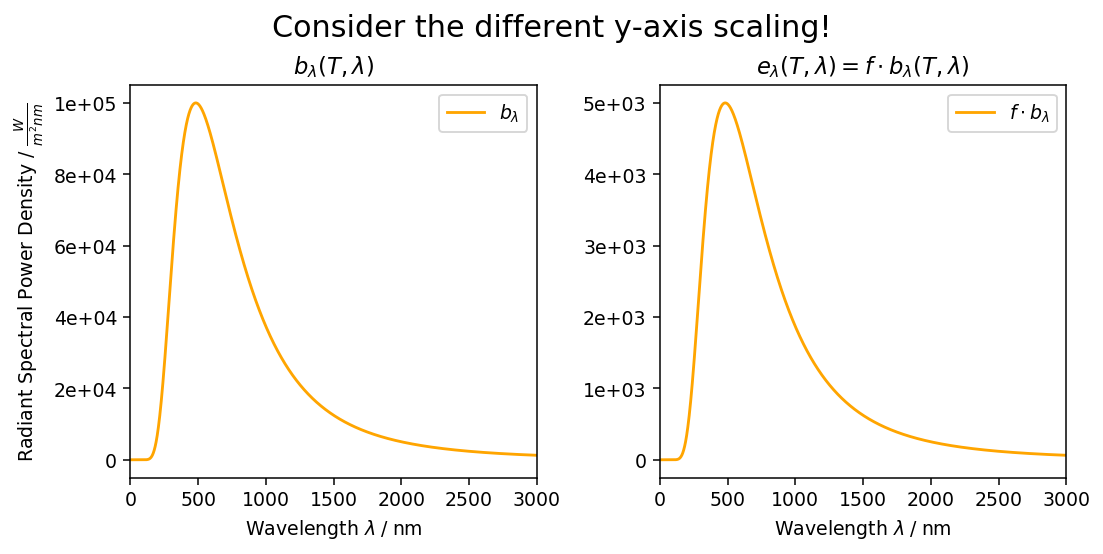

In [8]:
# PLOT COMPARISION
# For doc on axes class see: https://matplotlib.org/api/axes_api.html
# add_subplot(nrows, ncols, index, **kwargs)


#fig = plt.figure(2,figsize=(8,4), dpi = 136)
fig, axs = plt.subplots(1, 2, figsize=(8,4), dpi = 136, constrained_layout=True)
[ax1, ax2] = axs

fig.suptitle("Consider the different y-axis scaling!", fontsize=16)

#ax1 = fig.add_subplot(121)
ax1.set_title(r"$b_\lambda(T, \lambda)$")
ax1.set_xlabel(r"Wavelength $\lambda\;/\;\mathrm{nm}$")
ax1.set_ylabel(r"Radiant Spectral Power Density / $\frac{W}{m^2 nm}$")
ax1.plot(lam*1e9, b_lam*1e-9,"-",color="orange", label=r"$b_\lambda$") # local definitions: line and marker style, color
ax1.legend()
ax1.set_xlim([0,3000])
ax1.ticklabel_format(axis='both', style='sci')
ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:,.2g}')) # 2 decimal places

#ax2 = fig.add_subplot(122)
ax2.set_title(r"$e_\lambda(T, \lambda) = f\cdot b_\lambda(T, \lambda)$")
ax2.set_xlabel(r"Wavelength $\lambda\;/\;\mathrm{nm}$")
#ax2.set_ylabel(r"$e_\lambda(T, \lambda)\;/\;\frac{W}{m^2 nm}$")
ax2.plot(lam*1e9, e_lam*1e-9,"-",color="orange", label=r"$f\cdot b_\lambda$") # local definitions: line and marker style, color
ax2.legend()
ax2.set_xlim([0,3000])
ax2.ticklabel_format(axis='both', style='sci')
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:,.2g}')) # 2 decimal places

plt.show() # This makes Jupyter read the resources!

# Integration with Trapezoid Method #

$\lambda$ is an array with $n+1$ values (index runs from $0$ to $n$): 

$$\lambda= (\lambda_0, \lambda_1, \lambda_2, \ldots, \lambda_{n})$$


$\lambda_L$ is an array with $n$ values:

$$\lambda_L = (\lambda_0, \lambda_1, \lambda_2, \ldots, \lambda_{n-2}, \lambda_{n-1}) $$

$$\lambda_R = (\lambda_1, \lambda_2, \lambda_3, \ldots, \lambda_{n-1}, \lambda_{n}) $$

You can think of these arrays being vectors. If you subtract them you subtract elementwise, i.e.:

$$\Delta \lambda = \lambda_R-\lambda_L = (\lambda_1 - \lambda_0, \lambda_2- \lambda_1, \ldots, \lambda_{n-1} - \lambda_{n-2}, \lambda_{n} - \lambda_{n-1}) $$


In [9]:
# Trapezoid method:
lamR = lam[1:]
lamL = lam[0:-1]
Dlam = lamR-lamL

fR = planck(T,lamR)*fac # scaling factor fac is defined above.
fL = planck(T,lamL)*fac

h = 1/2.*(fL + fR) # Average height if the trapazoid

I = np.sum(h*Dlam)

print("The integral is approximately: %.3g W/m²" % I)
print("The total exitance from Stefan-Boltzmann: %.3g W/m²" % (b_T*fac))
print("\nConsider that the function is rescaled (mult. with factor).\nThe integral is scaled with the same factor.")

The integral is approximately: 3.67e+06 W/m²
The total exitance from Stefan-Boltzmann: 3.67e+06 W/m²

Consider that the function is rescaled (mult. with factor).
The integral is scaled with the same factor.
